<a href="https://colab.research.google.com/github/Tarek-1/Data-Science-Projects/blob/main/RS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Dataset Link:
https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset

# Assessing

In [6]:
df = pd.read_csv(f'/content/amazon.csv')
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [7]:
print("\nDataset Shape:")
df.shape


Dataset Shape:


(1465, 16)

In [8]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-nul

discounted_price, actual_price, rating, and rating_count were all of type object, we can change them to a numeric data type

In [9]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


the null values is not an issue in this case

In [10]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
df.duplicated().sum()


Number of duplicate rows:


np.int64(0)

The whole row could be not duplicated but what about a subset of ['user_id', 'product_id', 'review_id']

In [11]:
duplicates = df.duplicated(subset=['user_id', 'product_id', 'review_id'], keep=False)

#count the num of duplicated rows
num_duplicates = duplicates.sum()
print(f" Found {num_duplicates} duplicate rows based only on ['user_id', 'product_id', 'review_id'].")


#print a sample of duplicates
if num_duplicates > 0:
    print("\n Sample duplicated rows based on those 3 columns:")
    display(df.loc[duplicates, ['user_id', 'product_id', 'review_id']].head())


 Found 188 duplicate rows based only on ['user_id', 'product_id', 'review_id'].

 Sample duplicated rows based on those 3 columns:


,user_id,product_id,review_id
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R..."


In [12]:
#invistigate one of the duplicates
df[df.product_id =='B07JW9H4J1']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,270",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/I/51UsScvHQN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
614,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [13]:
#invistigate another one
df[df.product_id =='B096MSW6CT']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
379,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/I/31IvNJZnmd...,https://www.amazon.in/Sounce-iPhone-Charging-C...
623,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


it seems that the difference occurs one columns like the price and rating count and the diff is not huge, and since the number of duplicated rows is only 188 rows, I don't think that it will be an issue to g

In [14]:
#check the rating values to confirm if we can change the data type
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [15]:
#check the rating values to confirm if we can change the data type
df.rating_count.unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

since all the data is float, so, we can change the data type to be float and we need to remove the '|'

In [16]:
#print the rows with this value
df[df.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


one record could be removed and will not cause an issue

In [17]:
#check the columns that are suspected to have multiple values in the same cell
cols_to_check = ['user_id', 'user_name', 'review_id', 'review_title', 'review_content']

for col in cols_to_check:
    df[col] = df[col].astype(str)
    multi_value_rows = df[col].str.contains(',')
    count = multi_value_rows.sum()
    print(f" {col}: {count} rows have multiple values (comma-separated)")


 user_id: 1461 rows have multiple values (comma-separated)
 user_name: 1461 rows have multiple values (comma-separated)
 review_id: 1461 rows have multiple values (comma-separated)
 review_title: 1461 rows have multiple values (comma-separated)
 review_content: 1463 rows have multiple values (comma-separated)


In [18]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


**Data Assessment Observations:**

 - The category column contains multiple nested subcategories in a single cell, separated by the | character. This should be split into individual levels.

 - Several user-related columns (user_id, user_name, review_id) contain multiple values separated by commas, indicating that a single row may represent multiple user reviews. This violates the expected user-item-rating structure for recommender systems and should be separated into individual rows.

 - Columns like discounted_price, actual_price, rating, and rating_count are stored as object types. These should be converted to numeric types. However, price columns contain currency symbols (₹) and commas, which must be removed before conversion.

 - Some ratings appear to be invalid or out of range (ex:'|'), and should be filtered out or cleaned.

 - The rating_count column contains comma-separated numbers, which need to be cleaned and converted to integers.

 - Duplicates exist based on the combination of ['user_id', 'product_id', 'review_id'], and should be removed

 - Some columns may be unnecessary and can be dropped.

 - A new column rating_weighted can be created, combining rating and rating_count to give more weight to products with a high number of ratings. This helps identify consistently well-rated products more reliably.



# Cleaning


In [19]:
# make a copy from the data to not affect the original one
df_copy= df.copy()
df_copy.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [20]:
# Clean price columns
df_copy['discounted_price'] = df_copy['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df_copy['actual_price'] = df_copy['actual_price'].replace('[₹,]', '', regex=True).astype(float)

df_copy.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [21]:
# delete the record which contains rating = '|'
df_copy = df_copy[df_copy['product_id'] != 'B08L12N5H1']

#validation
df_copy[df_copy.rating == '|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [22]:
# Clean rating and rating_count columns
df_copy['rating'] = pd.to_numeric(df_copy['rating'])
df_copy['rating_count'] = (
    pd.to_numeric(
        df_copy['rating_count'].str.replace(',', ''),
        errors='coerce'
    )
    .astype('Int64')
)
#validation
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   Int64  
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   object

<ipython-input-22-b2d4b985aba3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['rating'] = pd.to_numeric(df_copy['rating'])
<ipython-input-22-b2d4b985aba3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['rating_count'] = (


In [23]:
#check for invalid ratings
df_copy[(df_copy['rating'] < 1.0) & (df_copy['rating'] > 5.0)]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


Now that the data types have been properly adjusted, let's add a new column to our dataset called rating_weighted. This feature combines both the average rating and the number of ratings to provide a more balanced measure of product quality. By weighting the average rating based on how many users rated the product, we give more importance to ratings backed by a larger number of customers. This helps highlight products that are not only well-rated but also widely reviewed—offering a more reliable indicator of overall customer satisfaction than average rating alone.

In [24]:
# Creating the column "rating_weighted"
df_copy['rating_weighted'] = df_copy['rating'] * df_copy['rating_count']

#validation
df_copy['rating_weighted']

<ipython-input-24-75ff693e1103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['rating_weighted'] = df_copy['rating'] * df_copy['rating_count']


,rating_weighted
0,101929.8
1,175976.0
2,30919.2
3,396324.6
4,71001.0
...,...
1460,4360.0
1461,16883.8
1462,1684.8
1463,32124.0


In [25]:
#Extract main category from the full category path
#df_copy['sub_category'] = df_copy['category'].astype(str).str.split('|').str[-1]
df_copy['main_category'] = df_copy['category'].astype(str).str.split('|').str[0]

#validation
print(df_copy['category'][0])
print(df_copy['main_category'][0])


Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Computers&Accessories


<ipython-input-25-744705182354>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['main_category'] = df_copy['category'].astype(str).str.split('|').str[0]


In [26]:
#remove duplicates
df_copy.drop_duplicates(subset=['user_id', 'product_id', 'review_id'], inplace=True)

#validation
duplicates = df_copy.duplicated(subset=['user_id', 'product_id', 'review_id'], keep=False)

#count the num of duplicated rows
num_duplicates = duplicates.sum()
print(f" Found {num_duplicates} duplicate rows based only on ['user_id', 'product_id', 'review_id'].")


 Found 0 duplicate rows based only on ['user_id', 'product_id', 'review_id'].


<ipython-input-26-dee097450d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop_duplicates(subset=['user_id', 'product_id', 'review_id'], inplace=True)


In [27]:
#drop unneeded columns
df_copy.drop(['product_link','img_link'], axis = 1, inplace = True)

#valdiation
df_copy.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,rating_weighted,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64%,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,101929.8,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43%,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,175976.0,Computers&Accessories


## Collaborative Filtering Recommendations
### Collaborative filtering is a recommendation system technique that suggests items to users based on the preferences of other users. Instead of analyzing item attributes, collaborative filtering relies on the patterns of user interactions with items to make recommendations.

In [28]:
# Let's print first few rows to understand the file
print(df_copy.head())

# Assume columns are 'user_id', 'product_id', 'rating'
df_copy2 = df_copy[['user_id', 'product_id', 'rating']]

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price discount_percentage  rating  rating_count  \
0        1099.0                 64%     4.2         24269   
1         349.0         

In [29]:
# Encode user_id and product_id to integers
user2idx = {user: idx for idx, user in enumerate(df_copy['user_id'].unique())}
item2idx = {item: idx for idx, item in enumerate(df_copy['product_id'].unique())}

df_copy['user_id'] = df_copy['user_id'].map(user2idx)
df_copy['product_id'] = df_copy['product_id'].map(item2idx)

n_users = df_copy['user_id'].nunique()
n_items = df_copy['product_id'].nunique()

print(f"Number of Users: {n_users}, Number of Items: {n_items}")

Number of Users: 1193, Number of Items: 1350


# The NeuMF (Neural Matrix Factorization) model
a sophisticated approach to collaborative filtering, leveraging the power of neural networks to predict user-item interactions. This model is particularly effective in recommendation systems, where the goal is to predict a user's rating for a given item based on past interactions.

In [30]:
# NeuMF Model
class NeuMF(nn.Module):
    def __init__(self, n_users, n_items, embedding_dim=32):
        super(NeuMF, self).__init__()
        self.user_embedding_gmf = nn.Embedding(n_users, embedding_dim)
        self.item_embedding_gmf = nn.Embedding(n_items, embedding_dim)

        self.user_embedding_mlp = nn.Embedding(n_users, embedding_dim)
        self.item_embedding_mlp = nn.Embedding(n_items, embedding_dim)

        self.fc_layers = nn.Sequential(
            nn.Linear(embedding_dim * 2, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
        )
        self.output_layer = nn.Linear(embedding_dim + 32, 1)
        self.sigmoid = nn.Sigmoid()  # Add Sigmoid activation

    def forward(self, user_indices, item_indices):
        user_embed_gmf = self.user_embedding_gmf(user_indices)
        item_embed_gmf = self.item_embedding_gmf(item_indices)
        gmf = user_embed_gmf * item_embed_gmf  # Element-wise product

        user_embed_mlp = self.user_embedding_mlp(user_indices)
        item_embed_mlp = self.item_embedding_mlp(item_indices)
        mlp = torch.cat((user_embed_mlp, item_embed_mlp), dim=-1)
        mlp = self.fc_layers(mlp)

        neuMF = torch.cat((gmf, mlp), dim=-1)
        output = self.output_layer(neuMF)
        output = self.sigmoid(output) * 5  # Apply Sigmoid activation
        return output.squeeze()


In [31]:
# Split data: 20% train, 80% test
train_df, test_df = train_test_split(df_copy, test_size=0.8, random_state=42)

In [32]:
train_df['rating'] = pd.to_numeric(train_df['rating'], errors='coerce')
test_df['rating'] = pd.to_numeric(test_df['rating'], errors='coerce')

In [33]:
#Prepare Dataset for PyTorch
train_users = torch.tensor(train_df['user_id'].values, dtype=torch.int64)
train_items = torch.tensor(train_df['product_id'].values, dtype=torch.long)
train_ratings = torch.tensor(train_df['rating'].values, dtype=torch.float32)

test_users = torch.tensor(test_df['user_id'].values, dtype=torch.long)
test_items = torch.tensor(test_df['product_id'].values, dtype=torch.long)
test_ratings = torch.tensor(test_df['rating'].values, dtype=torch.float32)


In [34]:
# Initialize Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuMF(n_users, n_items).to(device)

# Loss and Optimizer
criterion = nn.MSELoss()

The choice of optimizer is a critical aspect of training neural networks, as it directly influences the efficiency and effectiveness of the learning process. In the context of the NeuMF (Neural Matrix Factorization) model, the Adam optimizer is employed, configured with specific parameters to enhance the model's performance. This essay delves into the rationale and implications of using the Adam optimizer with a learning rate of 0.0005 and a weight decay of 1e-5.

In [35]:
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

In [36]:
# Train the Model
n_epochs = 50
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()

    preds = model(train_users.to(device), train_items.to(device))
    loss = criterion(preds, train_ratings.to(device))
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluate
    model.eval()
    with torch.no_grad():
        test_preds = model(test_users.to(device), test_items.to(device))
        test_loss = criterion(test_preds, test_ratings.to(device))
        test_losses.append(test_loss.item())

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch 1/50, Train Loss: 3.0785, Test Loss: 2.9185
Epoch 2/50, Train Loss: 3.0357, Test Loss: 2.8804
Epoch 3/50, Train Loss: 2.9918, Test Loss: 2.8425
Epoch 4/50, Train Loss: 2.9544, Test Loss: 2.8048
Epoch 5/50, Train Loss: 2.8679, Test Loss: 2.7670
Epoch 6/50, Train Loss: 2.8191, Test Loss: 2.7293
Epoch 7/50, Train Loss: 2.7896, Test Loss: 2.6915
Epoch 8/50, Train Loss: 2.7445, Test Loss: 2.6537
Epoch 9/50, Train Loss: 2.7140, Test Loss: 2.6157
Epoch 10/50, Train Loss: 2.5946, Test Loss: 2.5777
Epoch 11/50, Train Loss: 2.6299, Test Loss: 2.5395
Epoch 12/50, Train Loss: 2.5671, Test Loss: 2.5012
Epoch 13/50, Train Loss: 2.5164, Test Loss: 2.4627
Epoch 14/50, Train Loss: 2.4319, Test Loss: 2.4240
Epoch 15/50, Train Loss: 2.4021, Test Loss: 2.3850
Epoch 16/50, Train Loss: 2.3297, Test Loss: 2.3458
Epoch 17/50, Train Loss: 2.3191, Test Loss: 2.3064
Epoch 18/50, Train Loss: 2.2557, Test Loss: 2.2669
Epoch 19/50, Train Loss: 2.2284, Test Loss: 2.2271
Epoch 20/50, Train Loss: 2.1716, Test Lo

In [37]:
# Evaluation Metrics
model.eval()
with torch.no_grad():
    # Generate predictions
    preds = model(test_users.to(device), test_items.to(device))
    preds = preds.cpu().numpy()
    test_ratings_np = test_ratings.numpy()

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(test_ratings_np, preds))
    mae = np.mean(np.abs(test_ratings_np - preds))  # Alternative to mean_absolute_error

    # Print results
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")


Test RMSE: 0.9749
Test MAE: 0.8658


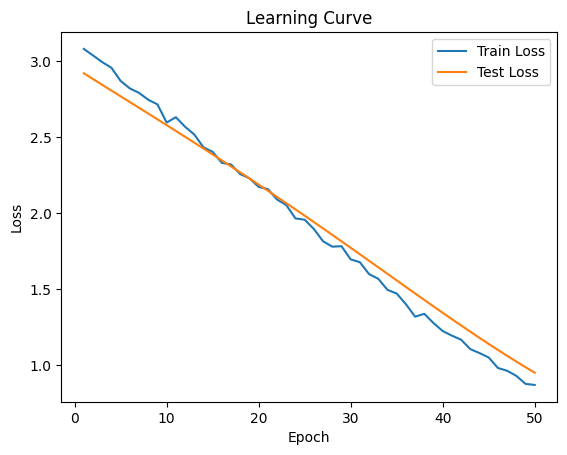

In [38]:
# 9. Plot Learning Curve
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [39]:
# Test Some Actual Predictions
sample_users = test_users[:5]
sample_items = test_items[:5]

model.eval()
with torch.no_grad():
    sample_preds = model(sample_users.to(device), sample_items.to(device))

print("\nSample Predictions:")
for u, i, p in zip(sample_users, sample_items, sample_preds):
    print(f"User {u.item()} - Item {i.item()} => Predicted Rating: {p.item():.2f}")


Sample Predictions:
User 42 - Item 51 => Predicted Rating: 3.22
User 934 - Item 1091 => Predicted Rating: 2.52
User 1146 - Item 1303 => Predicted Rating: 3.01
User 347 - Item 510 => Predicted Rating: 3.05
User 908 - Item 1065 => Predicted Rating: 3.74


# Content-Based Recommendation System

In this project, we build a content-based recommendation system using textual information about products.
The main idea behind content-based filtering is to recommend items that are similar to a selected item based on the item's own attributes, without relying on user behavior.

We construct a textual representation of each product by combining its `name`, `description`, `main category`, `review title`, and `review content`.
By applying TF-IDF (Term Frequency–Inverse Document Frequency) vectorization, we transform these combined texts into numerical vectors that capture the importance of words across the dataset.

Using these vectors, we compute pairwise cosine similarities between products, allowing us to identify and recommend the top products that are most textually similar to a given product.


In [40]:
# Selecting columns we need
df_CB = df_copy[["product_name", "about_product", "main_category", "review_title", "review_content"]].copy()

In [41]:
df_CB.head()

,product_name,about_product,main_category,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,High Compatibility : Compatible With iPhone 12...,Computers&Accessories,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"Compatible with all Type C enabled devices, be...",Computers&Accessories,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,【 Fast Charger& Data Sync】-With built-in safet...,Computers&Accessories,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,The boAt Deuce USB 300 2 in 1 cable is compati...,Computers&Accessories,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Computers&Accessories,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [42]:
#Check for duplicate rows
print("\nNumber of duplicate rows:")
df_CB.duplicated().sum()


Number of duplicate rows:


np.int64(8)

In [43]:
df_CB[df_CB.duplicated(keep=False)]

,product_name,about_product,main_category,review_title,review_content
243,"Smashtronics® - Case for Firetv Remote, Fire S...",【100% Fits】Specially designed for Fire TV Stic...,Electronics,"Cover is Little loose for Fire remote cover,I ...","All is good except little loose cover,I ordere..."
296,"Smashtronics® - Case for Firetv Remote, Fire S...",【100% Fits】Specially designed for Fire TV Stic...,Electronics,"Cover is Little loose for Fire remote cover,I ...","All is good except little loose cover,I ordere..."
334,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ..."
364,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ..."
366,"Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...",Exynos 1280 Octa Core 2.4GHz 5nm Processor wit...,Electronics,"THE PERFECT PHONE – FOR MY REQUIREMENTS,Galaxy...",I would not consider buying an i-phone simply ...
368,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ..."
380,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,"Worth the money,Good smart watch,the screen do...","I liked it, worth the money, light weight and ..."
385,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,"7-8/10, Decent, good for day to day use,Good c...","2 months review- its been working fine, there'..."
399,"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...",Upto 12GB RAM with RAM Plus | 128GB internal m...,Electronics,"Phone, camera, heating - works for me, may not...","I am not big on camera usage, personally. I wa..."
411,"Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...",Exynos 1280 Octa Core 2.4GHz 5nm Processor wit...,Electronics,"THE PERFECT PHONE – FOR MY REQUIREMENTS,Galaxy...",I would not consider buying an i-phone simply ...


In [44]:
df_CB = df_CB.drop_duplicates(keep='first').reset_index(drop=True)

In [45]:
print("Remaining duplicates:", df_CB.duplicated().sum())

Remaining duplicates: 0


## Text Cleaning Before TF-IDF

First, we clean the `main_category` field by replacing special characters like `|`, `&`, and `/` with spaces and converting all text to lowercase. This cleaned text is saved into a new column called `category_clean`.

Next, we clean the `review_title` and `review_content` fields by:
- Removing URLs (links),
- Converting text to lowercase,
- Keeping only alphabetic characters, numbers, and spaces,
- Removing extra spaces.

After cleaning individual fields, we merge the following into a single `combined_text` field:
- `product_name`
- `about_product`
- `category_clean`
- `review_title`
- `review_content`

Finally, we clean the merged `combined_text` again to ensure the text is fully lowercase, free of special characters, numbers, and extra spaces.


In [46]:
def clean_category(cat):
    if pd.isna(cat):
        return ''
    return cat.replace('|', ' ').replace('&', ' ').replace('/', ' ').lower()


df_CB.loc[:, 'category_clean'] = df_CB['main_category'].apply(clean_category)

In [47]:
# remove links, lowercase, special characters, and extra spaces
def clean_text(text):
    text = re.sub(r'http\S+', ' ', str(text))  # Remove URLs (http, https links)
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Clean the review_title and review_content first
df_CB.loc[:, 'review_title'] = df_CB['review_title'].apply(clean_text)
df_CB.loc[:, 'review_content'] = df_CB['review_content'].apply(clean_text)

# Then create combined_text
df_CB.loc[:, 'combined_text'] = (
    df_CB['product_name'].fillna('') + ' ' +
    df_CB['about_product'].fillna('') + ' ' +
    df_CB['category_clean'].fillna('') + ' ' +
    df_CB['review_title'].fillna('') + ' ' +
    df_CB['review_content'].fillna('')
)

# Clean the combined_text too
df_CB.loc[:, 'combined_text'] = df_CB['combined_text'].apply(clean_text)

# Check the cleaned result
df_CB['combined_text'].head()

,combined_text
0,wayona nylon braided usb to lightning fast cha...
1,ambrane unbreakable 60w 3a fast charging 1 5m ...
2,sounce fast phone charging cable data sync usb...
3,boat deuce usb 300 2 in 1 type c micro usb str...
4,portronics konnect l 1 2m fast charging 3a 8 p...


### Checking for duplicates after the cleaning.

In [48]:
df_CB[df_CB['combined_text'].duplicated(keep=False)].sort_values(by='combined_text')

,product_name,about_product,main_category,review_title,review_content,category_clean,combined_text
363,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,worth the money good smart watch the screen do...,i liked it worth the money light weight and co...,electronics,fire boltt ninja call pro plus 1 83 smart watc...
369,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Fire-Boltt is India' No 1 Wearable Watch Brand...,Electronics,worth the money good smart watch the screen do...,i liked it worth the money light weight and co...,electronics,fire boltt ninja call pro plus 1 83 smart watc...


In [49]:
df_CB = df_CB.drop_duplicates(subset='combined_text', keep='first').reset_index(drop=True)

In [50]:
df_CB[df_CB['combined_text'].duplicated(keep=False)].sort_values(by='combined_text')

,product_name,about_product,main_category,review_title,review_content,category_clean,combined_text


## TF-IDF Vectorization

We prepare the text data for machine learning by applying TF-IDF vectorization as follows:

We initialize a `TfidfVectorizer` with the following settings:
   - `stop_words='english'`: removes common English stopwords.
   - `min_df=2`: ignores words that appear in fewer than 2 different products.
   - `token_pattern=r'\b[a-zA-Z]{2,}\b'`: keeps only words with at least two alphabetic characters.

The resulting matrix has:
   - One row per product.
   - One column per word in the vocabulary.
   - Each value representing the TF-IDF weight of a word for a specific product.

In [51]:
tfidf = TfidfVectorizer(stop_words='english', min_df=2, token_pattern=r'\b[a-zA-Z]{2,}\b')
tfidf_matrix = tfidf.fit_transform(df_CB['combined_text'])

In [52]:
# JUST TO SEE THE MATRIX
tfidf_feature_names = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf_feature_names)

tfidf_df

,aa,aaa,aac,aacha,aap,aata,aaya,ab,abandoned,abc,...,zinq,zip,zipper,zone,zones,zoom,zoomed,zoul,zuke,zuvexa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity Computation

We compute the similarity matrix between all products using cosine similarity.

This similarity matrix will be used to identify and recommend products that are most similar to a given product based on textual features.


In [53]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [54]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_CB['product_name'], columns=df_CB['product_name'])
cosine_sim_df.head()

product_name,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)","Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)","Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices","boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)","Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)","pTron Solero TB301 3A Type-C Data and Fast Charging Cable, Made in India, 480Mbps Data Sync, Strong and Durable 1.5-Meter Nylon Braided USB Cable for Type-C Devices for Charging Adapter (Black)","boAt Micro USB 55 Tangle-free, Sturdy Micro USB Cable with 3A Fast Charging & 480mbps Data Transmission (Black)",MI Usb Type-C Cable Smartphone (Black),"TP-Link USB WiFi Adapter for PC(TL-WN725N), N150 Wireless Network Adapter for Desktop - Nano Size WiFi Dongle Compatible with Windows 11/10/7/8/8.1/XP/ Mac OS 10.9-10.15 Linux Kernel 2.6.18-4.4.3","Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Micro USB Cable for Smartphones, Tablets, Laptops & Other Micro USB Devices, 480Mbps Data Sync, Quick Charge 3.0 (RCM15, Black)",...,"USHA 1212 PTC with Adjustable Thermostat Fan Heater (Black/Brown, 1500-Watts).","4 in 1 Handheld Electric Vegetable Cutter Set,Wireless Food Processor Electric Food Chopper for Garlic Chili Pepper Onion Ginger Celery Meat with Brush",Philips HD9306/06 1.5-Litre Electric Kettle (Multicolor),"Libra Room Heater for Home, Room Heaters Home for Winter, Electric Heater with 2000 Watts Power as per IS Specification for Small to Medium Rooms - FH12 (Grey)",NGI Store 2 Pieces Pet Hair Removers for Your Laundry Catcher Lint Remover for Washing Machine Lint Remover Reusable Portable Silica Gel Clothes Washer Dryer Floating Ball,"Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | for All Types of RO Water purifiers (5 Piece, White, 10 Inch, 5 Micron) - RO Spun Filter Cartridge Sponge Replacement Water Filter Candle","Prestige Delight PRWO Electric Rice Cooker (1 L, White)","Bajaj Majesty RX10 2000 Watts Heat Convector Room Heater (White, ISI Approved)",Havells Ventil Air DSP 230mm Exhaust Fan (Pista Green),Borosil Jumbo 1000-Watt Grill Sandwich Maker (Black)
product_name,,,,,,,,,,,,,,,,,,,,,
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",1.000000,0.267253,0.343521,0.210571,0.404721,0.265923,0.249517,0.201017,0.096688,0.263353,...,0.038153,0.037546,0.047536,0.039990,0.009905,0.030723,0.029630,0.075960,0.062413,0.036288
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",0.267253,1.000000,0.221728,0.330511,0.385742,0.446725,0.366212,0.448337,0.127477,0.934417,...,0.034109,0.024186,0.052803,0.033792,0.007311,0.042814,0.060191,0.047902,0.059493,0.057525
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",0.343521,0.221728,1.000000,0.189516,0.248591,0.245724,0.206157,0.154642,0.098800,0.221905,...,0.025774,0.031932,0.039274,0.053037,0.007920,0.033934,0.029630,0.076649,0.074718,0.036061
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",0.210571,0.330511,0.189516,1.000000,0.232370,0.367542,0.562177,0.261134,0.113268,0.37168

## Building the Recommendation Function

We create the recommendation function in the following steps:

1. We create a mapping (`indices`) from product names to their DataFrame indices for quick lookup.
2. In the `recommend` function:
   - We retrieve the index of the selected product.
   - We fetch its corresponding similarity scores from the cosine similarity matrix.
   - We sort the similarity scores in descending order to get the most similar products.
   - We skip the first result (similarity with itself) and select the top 5 most similar products.
   - We extract the indices of these top similar products.
   - We return the product names corresponding to the selected indices.

In [55]:
indices = pd.Series(df_CB.index, index=df_CB['product_name']).drop_duplicates()
indices = indices[~indices.index.duplicated(keep='first')]  # Drop duplicate index entries

def recommend(product_name, cosine_sim=cosine_sim):
    if product_name not in indices:
        raise ValueError(f"'{product_name}' not found in product names.")

    idx = indices[product_name]
    print("Raw index lookup result:", idx)

    # Handle case where idx is a Series
    if isinstance(idx, pd.Series):
        idx = idx.values[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    product_indices = [i[0] for i in sim_scores]

    return df_CB['product_name'].iloc[product_indices]

## Testing the Recommendation Function

We provide a product name as input and observe the returned list of similar products.


In [56]:
recommend('Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)')

Raw index lookup result: 0


,product_name
220,Wayona Nylon Braided Usb Syncing And Charging ...
42,Wayona Nylon Braided 3A Lightning to USB A Syn...
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...
80,Wayona Usb Nylon Braided Data Sync And Chargin...
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...


In [57]:
recommend('Smashtronics® - Case for Firetv Remote, Fire Stick Remote Cover Case, Silicone Cover for TV Firestick 4K/TV 2nd Gen(3rd Gen) Remote Control - Light Weight/Anti Slip/Shockproof (Black)')

Raw index lookup result: 243


,product_name
100,Dealfreez Case Compatible with Fire TV Stick 3...
200,Caldipree Silicone Case Cover Compatible for 2...
317,7SEVEN® Compatible with Fire Tv Stick Remote w...
271,Dealfreez Case Compatible for Fire TV Stick 4K...
203,Cotbolt Silicone Case Cover Compatible for Sam...


In [58]:
recommend('Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution')

Raw index lookup result: 333


,product_name
363,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat..."
750,"Fire-Boltt Ninja Calling 1.69"" Bluetooth Calli..."
453,Fire-Boltt Ring 3 Smart Watch 1.8 Biggest Disp...
371,"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Ca..."
542,"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Ca..."


# Hybrid Model

In [59]:
def hybrid_recommend(user_id, product_name, content_weight=0.5, collab_weight=0.5, top_n=5):
    """
    Hybrid recommendation combining content-based and collaborative filtering

    Args:
        user_id: User ID for collaborative filtering
        product_name: Product name for content-based filtering
        content_weight: Weight for content-based recommendations (0-1)
        collab_weight: Weight for collaborative filtering (0-1)
        top_n: Number of recommendations to return

    Returns:
        DataFrame with hybrid recommendations
    """
    # Get content-based recommendations
    try:
        content_recs = recommend(product_name)
        content_recs = df_CB[df_CB['product_name'].isin(content_recs)]
    except ValueError:
        content_recs = pd.DataFrame(columns=df_CB.columns)

    # Get collaborative filtering recommendations
    user_idx = user2idx.get(user_id, -1)
    if user_idx != -1:
        # Get all items not rated by user
        rated_items = df_copy[df_copy['user_id'] == user_idx]['product_id'].unique()
        all_items = df_copy['product_id'].unique()
        unrated_items = [item for item in all_items if item not in rated_items]

        # Predict ratings for unrated items
        with torch.no_grad():
            user_tensor = torch.tensor([user_idx]*len(unrated_items), dtype=torch.long).to(device)
            item_tensor = torch.tensor(unrated_items, dtype=torch.long).to(device)
            predictions = model(user_tensor, item_tensor).cpu().numpy()

        # Create DataFrame of collaborative recommendations
        idx2item = {v: k for k, v in item2idx.items()}
        collab_recs = pd.DataFrame({
            'product_id': unrated_items,
            'predicted_rating': predictions
        })
        collab_recs = collab_recs.sort_values('predicted_rating', ascending=False).head(top_n)
        collab_recs['product_name'] = collab_recs['product_id'].map(idx2item)
        collab_recs = collab_recs.merge(df_CB, on='product_name', how='left')
    else:
        collab_recs = pd.DataFrame(columns=df_CB.columns)

    # Combine recommendations
    if not content_recs.empty and not collab_recs.empty:
        # Add weights to each recommendation type
        content_recs['hybrid_score'] = content_weight * 5  # Max content similarity is 1, scale to match ratings
        collab_recs['hybrid_score'] = collab_recs['predicted_rating'] * collab_weight

        # Combine and sort
        combined = pd.concat([content_recs, collab_recs])
        combined = combined.sort_values('hybrid_score', ascending=False).head(top_n)
        return combined[['product_name', 'about_product', 'hybrid_score']]

    elif not content_recs.empty:
        return content_recs.head(top_n)[['product_name', 'about_product']]

    elif not collab_recs.empty:
        return collab_recs.head(top_n)[['product_name', 'about_product', 'predicted_rating']]

    else:
        return pd.DataFrame(columns=['product_name', 'about_product'])

In [60]:
import random
# Get valid samples
valid_users = df['user_id'].dropna().unique()
valid_products = df['product_name'].dropna().unique()

# Select samples (using first valid entries)
entry = random.randint(0, len(valid_users) - 1)
sample_user = valid_users[entry]
sample_product = valid_products[entry]

# If user ID has multiple users separated by commas, take first one
if isinstance(sample_user, str) and ',' in sample_user:
    sample_user = sample_user.split(',')[0]

print("Selected user ID:", sample_user)
print("Selected product:", sample_product)

# Get recommendations
try:
    recommendations = hybrid_recommend(sample_user, sample_product, 0.3, 0.7, 8)
    print("\nHybrid Recommendations:")
    print(recommendations[['product_name', 'about_product']])
except Exception as e:
    print("Error:", e)

Selected user ID: AG7TJLDLH3HOUPRBUFW6KNUEGO4A
Selected product: Electvision Remote Control Compatible with Amazon Fire tv Stick (Pairing Manual Will be Back Side Remote Control)(P)
Raw index lookup result: 116

Hybrid Recommendations:
                                          product_name  \
48   7SEVEN® Compatible for Samsung Smart 4K Ultra ...   
79                                    Firestick Remote   
142  LRIPL Mi Remote Control with Netflix & Prime V...   
244  Electvision Remote Control for led Smart tv Co...   
251  7SEVEN® Compatible Vu Smart Tv Remote Control ...   
290                                   Firestick Remote   

                                         about_product  
48   1. 7SEVEN Compatible remote suitable for all O...  
79   Compatible For Amazon Fire TV Stick (3rd Gen, ...  
142  This Voice Command Compatible Remote is for Mi...  
244  Compatible Devices: High-grade remote control ...  
251  [Compatible Devices]: High-grade remote contro...  
290  by JBDE | 